In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('payment_fraud.csv')
df = df.sample(frac=0.1, random_state=1)
df

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays
8066,972,1,4.742303,paypal,0.002083
37860,2000,1,4.876771,paypal,202.093056
6655,176,1,4.505662,storecredit,0.000000
5218,5,2,4.895263,creditcard,4.959722
30950,1668,1,4.742303,creditcard,0.000694
...,...,...,...,...,...
15056,18,1,4.748314,creditcard,0.000000
20637,2,1,5.040929,paypal,0.000000
26741,2,1,4.745402,creditcard,0.000000
18890,674,1,4.836982,paypal,0.000000


In [55]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays
count,3922.000000,3922.000000,3922.000000,3922.000000
mean,857.117032,1.087455,4.743031,127.173005
std,802.730309,0.508786,0.393321,290.393871
min,1.000000,1.000000,2.596228,0.000000
25%,71.000000,1.000000,4.742303,0.000000
50%,611.500000,1.000000,4.886641,0.015972
75%,1789.750000,1.000000,4.962055,97.560417
max,2000.000000,10.000000,5.040929,1925.770833


In [56]:
kolich = ['accountAgeDays','numItems','localTime','paymentMethodAgeDays']
kach = ['paymentMethod']

In [57]:
len(df)

3922

In [58]:
len(df.drop_duplicates())

3683

In [59]:
df = df.drop_duplicates()
print(df.isnull().sum())

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
dtype: int64


In [60]:
df = pd.get_dummies(df, columns = kach)

In [61]:
from sklearn. preprocessing import StandardScaler
ss = StandardScaler()
df1 = df.copy()
ss.fit(df1)
df1.iloc[:, :] = ss.transform(df1)
df1

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
8066,0.203150,-0.176679,0.016418,-0.454377,-1.545388,1.783389,-0.243406
37860,1.520124,-0.176679,0.351362,0.224838,-1.545388,1.783389,-0.243406
6655,-0.816608,-0.176679,-0.573028,-0.454384,-1.545388,-0.560730,4.108362
5218,-1.035676,1.731563,0.397424,-0.437714,0.647087,-0.560730,-0.243406
30950,1.094798,-0.176679,0.016418,-0.454381,0.647087,-0.560730,-0.243406
...,...,...,...,...,...,...,...
15056,-1.019022,-0.176679,0.031390,-0.454384,0.647087,-0.560730,-0.243406
20637,-1.039520,-0.176679,0.760261,-0.454384,-1.545388,1.783389,-0.243406
26741,-1.039520,-0.176679,0.024137,-0.454384,0.647087,-0.560730,-0.243406
18890,-0.178618,-0.176679,0.252252,-0.454384,-1.545388,1.783389,-0.243406


In [62]:
# Выбросы
for i in df1:
    mean = np.mean(df1[i])
    std = np.std(df1[i])
    interval = [mean - 3 * std, mean + 3 * std]
    for index,val in enumerate(df1[i]):
        if not (interval[0] <= val <= interval[1]):
            df1[i][index] = np.nan

In [63]:
print(df1.isnull().sum())

accountAgeDays               0
numItems                     0
localTime                    0
paymentMethodAgeDays         0
paymentMethod_creditcard     0
paymentMethod_paypal         0
paymentMethod_storecredit    0
dtype: int64


In [64]:
df2 = df1.copy()
df2.columns = [f'pc{i}' for i in range(1,len(df1.columns)+1)]

In [65]:
df2

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
8066,0.203150,-0.176679,0.016418,-0.454377,-1.545388,1.783389,-0.243406
37860,1.520124,-0.176679,0.351362,0.224838,-1.545388,1.783389,-0.243406
6655,-0.816608,-0.176679,-0.573028,-0.454384,-1.545388,-0.560730,4.108362
5218,-1.035676,1.731563,0.397424,-0.437714,0.647087,-0.560730,-0.243406
30950,1.094798,-0.176679,0.016418,-0.454381,0.647087,-0.560730,-0.243406
...,...,...,...,...,...,...,...
15056,-1.019022,-0.176679,0.031390,-0.454384,0.647087,-0.560730,-0.243406
20637,-1.039520,-0.176679,0.760261,-0.454384,-1.545388,1.783389,-0.243406
26741,-1.039520,-0.176679,0.024137,-0.454384,0.647087,-0.560730,-0.243406
18890,-0.178618,-0.176679,0.252252,-0.454384,-1.545388,1.783389,-0.243406


In [66]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver="full")
df2.iloc[:, :] = pca.fit_transform(df2.iloc[:, :])
pca.components_

array([[-5.20958894e-03,  2.26294473e-02,  1.31646225e-02,
         2.83264793e-02, -7.20543225e-01,  6.62990049e-01,
         1.99365813e-01],
       [ 6.97744464e-01,  5.21591169e-02, -1.29991953e-01,
         7.02106076e-01,  1.31945697e-02, -3.39301570e-03,
        -1.98904461e-02],
       [ 2.98183158e-02, -1.93889450e-01, -8.37701168e-02,
        -5.19138750e-03, -1.03059427e-01, -3.73019428e-01,
         8.97055532e-01],
       [-1.49095584e-01,  7.18568006e-01, -6.72775047e-01,
        -2.76149264e-02, -3.70620513e-03, -3.93872484e-02,
         8.04772500e-02],
       [-2.25212040e-02,  6.52527066e-01,  7.23263676e-01,
         1.12216396e-01,  3.74984849e-04, -9.27537777e-02,
         1.71449569e-01],
       [-6.99642546e-01, -1.30547555e-01, -1.32190527e-02,
         7.02041747e-01,  1.49093951e-02, -1.28391035e-02,
        -5.75784133e-03],
       [-5.06261512e-17, -5.39466098e-17, -2.18249466e-16,
        -3.48334411e-18, -6.85409331e-01, -6.41069207e-01,
        -3.4531771

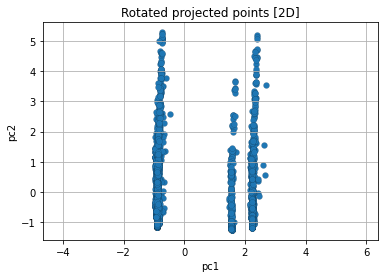

In [67]:
plt.figure()
plt.grid()
plt.scatter(df2['pc1'], df2['pc2'],  edgecolor='black', lw=.1, cmap='jet')
plt.title("Rotated projected points [2D]")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.axis('equal')
plt.show()

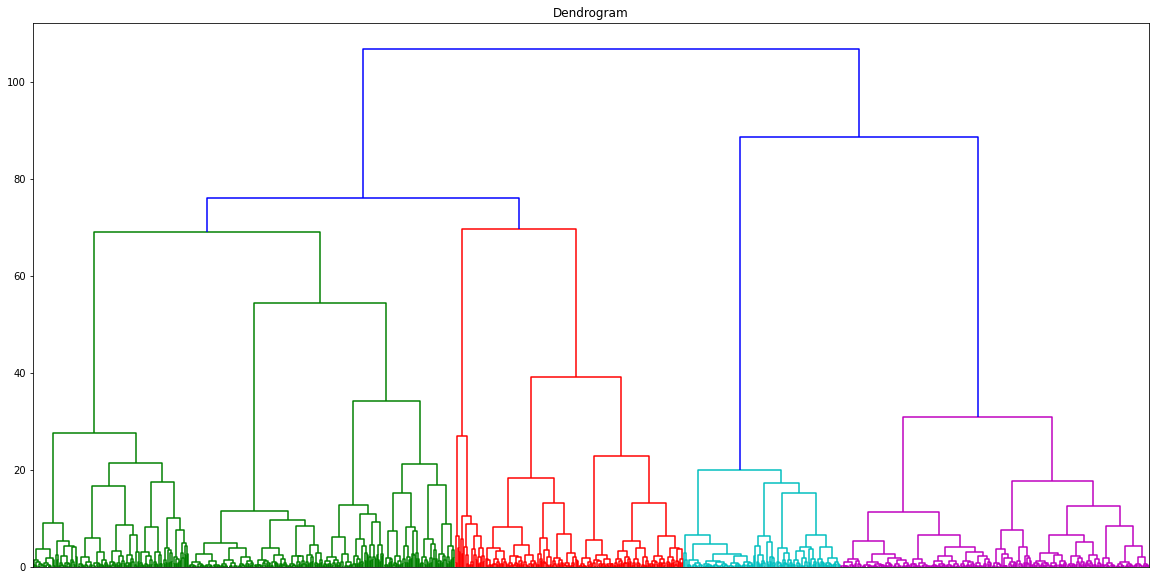

In [68]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(df2)
plt.figure(figsize=(20, 10))
dendrogram(linkage_array, truncate_mode='level', no_labels=True, p=10)
plt.title("Dendrogram")
plt.show()

In [70]:
import SimpSOM as sps

ModuleNotFoundError: No module named 'SimpSOM'